In [2]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import patches, lines
from matplotlib.patches import Polygon
import skimage.draw
from imgaug import augmenters as iaa

SCAPA_ROOT = '/mnt/scapa4'
ORKNEY_ROOT  ='/mnt/orkney1'

if sys.platform == 'win32':
    SCAPA_ROOT = 'Z:'
    ORKNEY_ROOT = 'Y:'
    
    
# Root directory of the project
ROOT_DIR = os.path.abspath('../../')

MASKRCNN_DIR = os.path.join(ROOT_DIR, 'maskrcnn', 'Mask_RCNN')
TRAINING_DIR = os.path.join(ROOT_DIR, 'maskrcnn', 'training')
DATASET_DIR = os.path.join(ROOT_DIR, 'datasets')

MODEL_DIR = os.path.join(ORKNEY_ROOT, 'Clusters', 'RandomXtl', 'MaskRCNN', 'training', 'logs')
COCO_DIR = os.path.join(ORKNEY_ROOT, 'Clusters', 'RandomXtl', 'MaskRCNN')

# Import Mask RCNN
sys.path.append(MASKRCNN_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log


OBJECT_NAME = 'Co4'
OBJECT_DIR = os.path.join(DATASET_DIR, OBJECT_NAME)

%matplotlib inline 


In [3]:
class CrystalsConfig(Config):
    """Configuration for training on the crystals dataset.
    Derives from the base Config class and overrides values specific
    to the toy shapes dataset.
    """
    # Give the configuration a recognizable name
    NAME = OBJECT_NAME
    
    # Backbone network architecture
    # Supported values are: resnet50, resnet101
    # From Nucleus example
    BACKBONE = "resnet101"

    # This computer has a GTX1060
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    # Number of classes (including background)
    NUM_CLASSES = 1 + 1  # background + 1 shape for crystals
    
    # Don't exclude based on confidence. Since we have two classes
    # then 0.5 is the minimum anyway as it picks between nucleus and BG
    # From Nucleus example
    DETECTION_MIN_CONFIDENCE = 0
    
    # Non-max suppression threshold to filter RPN proposals.
    # You can increase this during training to generate more propsals.
    # From Nucleus example
    RPN_NMS_THRESHOLD = 0.9
    
    # Maximum number of ground truth instances to use in one image
    # From Nucleus example
    MAX_GT_INSTANCES = 200

    # Max number of final detections per image
    # From Nucleus example
    DETECTION_MAX_INSTANCES = 200

    # Use small images for faster training. Set the limits of the small side
    # the large side, and that determines the image shape.
    IMAGE_MIN_DIM = int(800/2)
    IMAGE_MAX_DIM = int(1280/2)
    # Input image resizing
    # Random crops of size 512x512
    #IMAGE_RESIZE_MODE = "crop"
    #IMAGE_MIN_DIM = 512
    #IMAGE_MAX_DIM = 512
    #IMAGE_MIN_SCALE = 2.0

    # Use smaller anchors because our image and objects are small
    RPN_ANCHOR_SCALES = (16, 32, 64, 128, 256)#, 512)

    # Reduce training ROIs per image because the images are small and have
    # few objects. Aim to allow ROI sampling to pick 33% positive ROIs.
    TRAIN_ROIS_PER_IMAGE = 50

    # Use a small epoch since the data is simple
    STEPS_PER_EPOCH = 300

    # use small validation steps since the epoch is small
    VALIDATION_STEPS = 5
 

class InferenceConfig(CrystalsConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
inference_config = InferenceConfig()
crystals_config = CrystalsConfig()

In [5]:
# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

model_path = model.find_last()

assert model_path != "", "Provide path to trained weights"
print("Loading weights from ", model_path)

model.load_weights(model_path, by_name=True)

FileNotFoundError: [Errno 2] Could not find model directory under /mnt/orkney1/Clusters/RandomXtl/MaskRCNN/training/logs

In [4]:
def display(image_path):

    image = skimage.io.imread(image_path)


    # Run detection
    results = model.detect([image], verbose=1)

    # Visualize results
    r = results[0]
    visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                                ['BG', 'polygon'])

Processing 1 images
image                    shape: (800, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 640, 640, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 102300, 4)        min:   -0.28329  max:    1.18313  float32


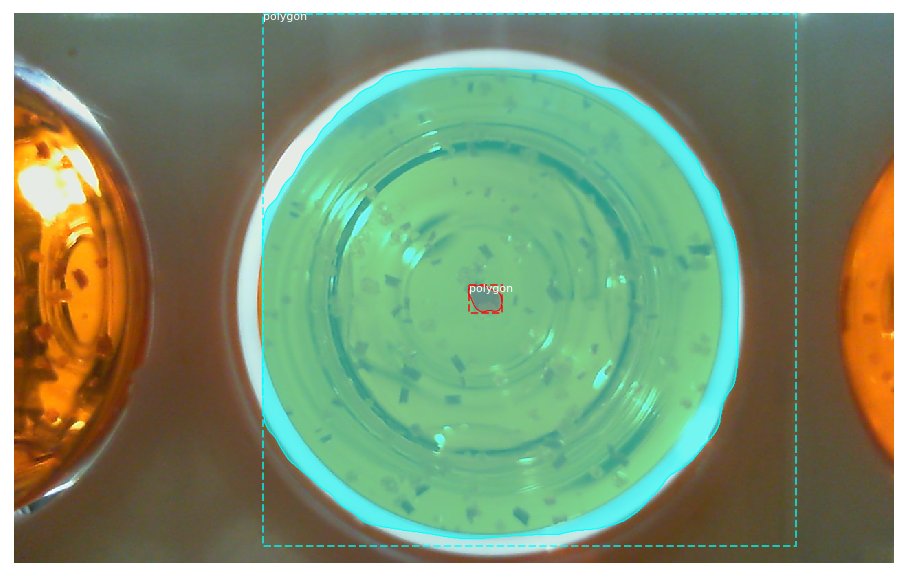

In [6]:
# path = '/mnt/scapa4/Edward Lee/03-Projects/07-RandomMOF/mbot/datasets/MOF5_twinned_split/train/img_20190705_161424;(604-1208)(806-1612).jpg'
path = '/mnt/orkney1/Chemobot/crystalbot_imgs/W19/20180214-0/Reaction_030/Images/Image_013.png'
# path = os.path.join(OBJECT_DIR, 'img_20190705_161428.jpg')
display(path)

Processing 1 images
image                    shape: (604, 806, 3)         min:    4.00000  max:  255.00000  uint8
molded_images            shape: (1, 640, 640, 3)      min: -123.70000  max:  138.20000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  806.00000  float64
anchors                  shape: (1, 102300, 4)        min:   -0.28329  max:    1.18313  float32


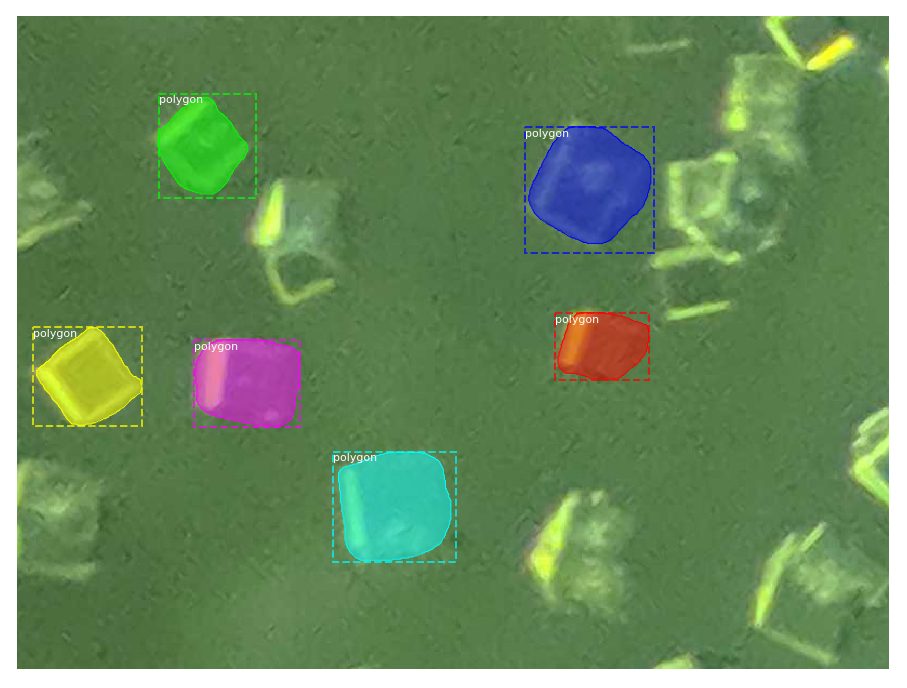

In [7]:
path = '/mnt/scapa4/Edward Lee/03-Projects/07-RandomMOF/mbot/datasets/MOF5_twinned_split/train/img_20190705_161424;(604-1208)(806-1612).jpg'
# path = os.path.join(OBJECT_DIR, 'img_20190705_161428.jpg')
display(path)

In [ ]:
path = os.path.join(OBJECT_DIR, 'img_20190705_161424.jpg')
display(path)